In [44]:
import numpy as np
import pandas as pd
# import dtale
import data_prep as dpr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error




### import Data

In [45]:
df= pd.read_csv("weatherAUS.csv")
subset_df = df[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Humidity9am','Humidity3pm']]

# Separate numeric and categorical columns
numeric_columns = ['MinTemp','MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm']
categorical_columns = ['Location', 'WindGustDir']
subset_df.info()
# df.info()
# dtale_instance = dtale.show(subset_df)
# dtale_instance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
dtypes: float64(10), object(2)
memory usage: 13.3+ MB


### Duplicate, Uniformed, Missing values

In [46]:
dpr.have_duplicate(subset_df)
print()
dpr.have_uniformed(subset_df)
print()

# missing data statistics: 
dpr.find_missing(subset_df)

# Remove rows with missing target ('MaxTemp') values
df_cleaned = subset_df.dropna(subset=['MaxTemp']) 

Number of duplicated records: 297


The DataFrame does not contain columns with uniformed values.


Missing values :
               Missing Value Count  Missing Value Rate
Location                         0                0.00
MinTemp                       1485                1.02
MaxTemp                       1261                0.87
Rainfall                      3261                2.24
WindGustDir                  10326                7.10
WindGustSpeed                10263                7.06
WindSpeed9am                  1767                1.21
WindSpeed3pm                  3062                2.11
Pressure9am                  15065               10.36
Pressure3pm                  15028               10.33
Humidity9am                   2654                1.82
Humidity3pm                   4507                3.10 



#### Missing data treating

In [47]:
# Option 1: Removing rows where independent variables have missing values

In [48]:
# Option 1: Filling independent variable Nan values with proper ones

# a- Fill 'WindGustDir' NaN values with a value representing "unknown" or "missing"
df_cleaned['WindGustDir'] = df_cleaned['WindGustDir'].fillna('unknown')

# Calculate the mean of each column
column_means = df_cleaned[numeric_columns].mean()
df_cleaned = df_cleaned.fillna(column_means)

df_cleaned.isnull().sum()


C:\Users\kseli\AppData\Local\Temp\ipykernel_40384\2270515740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['WindGustDir'] = df_cleaned['WindGustDir'].fillna('unknown')


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Pressure9am      0
Pressure3pm      0
Humidity9am      0
Humidity3pm      0
dtype: int64

### Correlation Map

<class 'pandas.core.frame.DataFrame'>
Index: 144199 entries, 0 to 145458
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       144199 non-null  object 
 1   MinTemp        144199 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       144199 non-null  float64
 4   WindGustDir    144199 non-null  object 
 5   WindGustSpeed  144199 non-null  float64
 6   WindSpeed9am   144199 non-null  float64
 7   WindSpeed3pm   144199 non-null  float64
 8   Pressure9am    144199 non-null  float64
 9   Pressure3pm    144199 non-null  float64
 10  Humidity9am    144199 non-null  float64
 11  Humidity3pm    144199 non-null  float64
dtypes: float64(10), object(2)
memory usage: 14.3+ MB


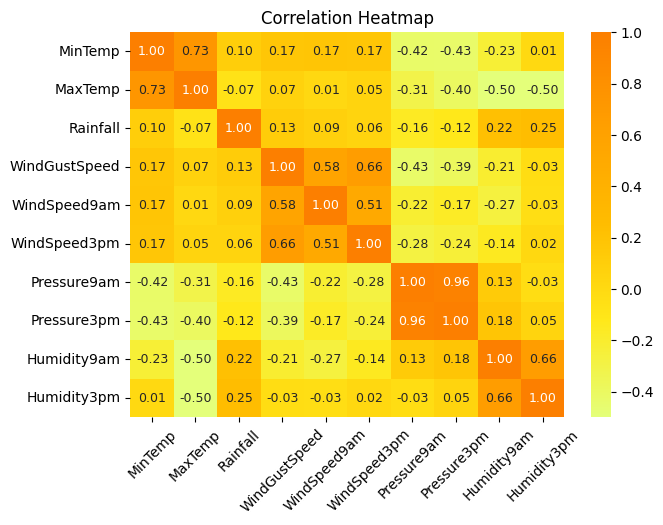

In [49]:
# Heatmap
correlation_matrix = df_cleaned[numeric_columns].corr()
plt.figure(figsize=(7, 5))  # Set the size of the heatmap
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Wistia', fmt=".2f", annot_kws={"fontsize": 9})
ax.set(title='Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
df_cleaned.info();

### Drop most correlated

In [50]:
df_cleaned = df_cleaned.drop('Pressure3pm',axis=1)
numeric_columns.remove('Pressure3pm')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144199 entries, 0 to 145458
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       144199 non-null  object 
 1   MinTemp        144199 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       144199 non-null  float64
 4   WindGustDir    144199 non-null  object 
 5   WindGustSpeed  144199 non-null  float64
 6   WindSpeed9am   144199 non-null  float64
 7   WindSpeed3pm   144199 non-null  float64
 8   Pressure9am    144199 non-null  float64
 9   Humidity9am    144199 non-null  float64
 10  Humidity3pm    144199 non-null  float64
dtypes: float64(9), object(2)
memory usage: 13.2+ MB


### Standart Scaling the numerical variables

In [51]:
# Identify the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float', 'int']).columns

# Extract the numeric columns into a separate dataframe
df_numeric = df_cleaned[numeric_columns]

# Perform standardization on the numeric dataframe
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df_numeric)

# Replace the original numeric columns with standardized values
df_cleaned[numeric_columns] = numeric_scaled

# Reassign the data types of the columns (if needed)
# df['A'] = df['A'].astype(int)
# df['B'] = df['B'].astype(float)


# df_scaled.dropna(how='all', inplace=True)
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144199 entries, 0 to 145458
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       144199 non-null  object 
 1   MinTemp        144199 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       144199 non-null  float64
 4   WindGustDir    144199 non-null  object 
 5   WindGustSpeed  144199 non-null  float64
 6   WindSpeed9am   144199 non-null  float64
 7   WindSpeed3pm   144199 non-null  float64
 8   Pressure9am    144199 non-null  float64
 9   Humidity9am    144199 non-null  float64
 10  Humidity3pm    144199 non-null  float64
dtypes: float64(9), object(2)
memory usage: 13.2+ MB


### Defining dependent and independent variables

In [52]:
X = df_cleaned.drop('MaxTemp', axis=1)
y = df_cleaned['MaxTemp']
dpr.find_missing(X)

### Encoding Categorical Variables 

##### Encode WindGustDir

In [53]:
# Prepare the data
wind_dir = pd.DataFrame({'Direction':['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']})

In [54]:

# # Create a mapping dictionary from the lookup DataFrame
# mapping_dict = dict(zip(wind_dir['Direction'], wind_dir.index))

# # Map the WindGustDir column to the corresponding index values
# X['WindGustDir_Encoded'] = X['WindGustDir'].map(mapping_dict)

# # Perform one-hot encoding on the WindGustDir_Encoded column
# one_hot_encoded = pd.get_dummies(X['WindGustDir_Encoded'], prefix='WindGustDir')

# # Concatenate the original DataFrame with the one-hot encoded columns
# X_encoded = pd.concat([X, one_hot_encoded], axis=1)

# # Print the encoded DataFrame
# X_encoded.info()
# mapping_dict;


In [55]:
# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Location', 'WindGustDir'], drop_first=True)

##### Split data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

##### Train models

In [57]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train);

#### Evaluate the models

In [58]:
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))

lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_pred))

ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)
ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_pred))

poly_reg_pred = poly_reg.predict(X_test_poly)
poly_reg_r2 = r2_score(y_test, poly_reg_pred)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_pred))

#### Print the performance measurements

In [69]:
columns = ['Explanation','MLR R2', 'MLR RMSE','LR R2', 'LR RMSE', 'RR R2', 'RR RMSE', 'PR R2', 'PR RMSE']
explanation = ["All columns standardized, Pressure3pm is dropped"]
test_results = [linear_reg_r2, linear_reg_rmse, lasso_reg_r2, lasso_reg_rmse, 
          ridge_reg_r2, ridge_reg_rmse, poly_reg_r2, poly_reg_rmse,
        ]
row_values = explanation + [round(num, 3) for num in test_results]
results = pd.DataFrame([row_values], columns=columns)
results.sample()
results.to_csv('analysis_results.csv', mode='a', index=False, header= False);

In [60]:
print("Multiple Linear Regression:")
print("R2:", linear_reg_r2)
print("RMSE:", linear_reg_rmse)
print()
print("Lasso Regression:")
print("R2:", lasso_reg_r2)
print("RMSE:", lasso_reg_rmse)
print()
print("Ridge Regression:")
print("R2:", ridge_reg_r2)
print("RMSE:", ridge_reg_rmse)
print()
print("Polynomial Regression:")
print("R2:", poly_reg_r2)
print("RMSE:", poly_reg_rmse)

Multiple Linear Regression:
R2: 0.8451640533752198
RMSE: 0.3943459812924858

Lasso Regression:
R2: -1.1343545345265937e-06
RMSE: 1.0021708559000984

Ridge Regression:
R2: 0.8451514572330954
RMSE: 0.3943620212919686

Polynomial Regression:
R2: 0.8902842193450056
RMSE: 0.3319525975277347
